<a href="https://colab.research.google.com/github/kuchaguangjie/ai-learn/blob/master/pytorch-learn/pytorch_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Learn - pytorch</h2>

In [ ]:
import numpy as np

np.sort([1,3,2])

array([1, 2, 3])

In [ ]:
import torch
print(torch.__version__)


2.1.0+cu121


In [ ]:
!nvidia-smi
!pwd

Wed Mar  6 02:07:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# tensor

In [ ]:
import torch
sc = torch.tensor(7) # scala, 0d,
# print("scalar item: ", sc.item())
print("scalar ndim: ", sc.ndim) # dimension
print("scalar shape: ", sc.shape) # size of each dimension,
print()

ve = torch.tensor([1,2,3]) # vector, 1d,
print("vector ndim: ", ve.ndim)
print("vector shape: ", ve.shape)
print()

ma = torch.tensor([[1,2,3],[4,5,6]]) # matrix, 2d,
print("matrix ndim: ", ma.ndim)
print("matrix shape: ", ma.shape)
print()

te = torch.tensor([[[1,2,3],[4,5,6]],
                   [[2,4,6],[8,10,12]]]) # tensor, 3d,
print("tensor ndim: ", te.ndim)
print("tensor shape: ", te.shape)
print()

ra = torch.rand(2,3)
print(f"random tensor: {ra}")
print()


scalar ndim:  0
scalar shape:  torch.Size([])

vector ndim:  1
vector shape:  torch.Size([3])

matrix ndim:  2
matrix shape:  torch.Size([2, 3])

tensor ndim:  3
tensor shape:  torch.Size([2, 2, 3])

random tensor: tensor([[0.8470, 0.7985, 0.5831],
        [0.1083, 0.3383, 0.0551]])



# tensor - operation

In [ ]:
arr = torch.tensor([1, 2, 3])
print(f'arr: {arr}')
print(f'arr*2 = {arr * 2}')
print(f'arr+10 = {arr + 10}')
print(f'arr-1 = {arr - 1}')
print(f'arr/2 = {arr / 2}')
print(f'arr%2 = {arr % 2}')

print(f'arr + arr: {arr + arr}')

print(f'arr * arr: {arr * arr}')


arr: tensor([1, 2, 3])
arr*2 = tensor([2, 4, 6])
arr+10 = tensor([11, 12, 13])
arr-1 = tensor([0, 1, 2])
arr/2 = tensor([0.5000, 1.0000, 1.5000])
arr%2 = tensor([1, 0, 1])
arr + arr: tensor([2, 4, 6])
arr * arr: tensor([1, 4, 9])


# tensor - operation - dot product

In [ ]:
arr = torch.tensor([1, 2, 3])
print(f'torch.matmul(arr, arr): {torch.matmul(arr, arr)}')
print(f'arr@arr: {arr @ arr}')
a1 = torch.rand(size=[2,3])
a2 = torch.rand(size=[3,4])
a3 = torch.rand(size=[2,3])
b = a1 @ a2
print(f'a1 @ a2 = {b}')
print(f'{a1.shape} dot {a2.shape} = {b.shape}')

print(f'b.T = {b.T}')
print(f'b @ b.T = {b @ b.T}')


torch.matmul(arr, arr): 14
arr@arr: 14
a1 @ a2 = tensor([[0.6243, 0.7429, 0.3539, 0.8048],
        [0.6550, 0.7463, 0.1633, 0.7538]])
torch.Size([2, 3]) dot torch.Size([3, 4]) = torch.Size([2, 4])
b.T = tensor([[0.6243, 0.6550],
        [0.7429, 0.7463],
        [0.3539, 0.1633],
        [0.8048, 0.7538]])
b @ b.T = tensor([[1.7145, 1.6278],
        [1.6278, 1.5809]])


# cuda (GPU)

In [ ]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'device: {device}')

print(f'device count: {torch.cuda.device_count()}')

t = torch.tensor([1, 2, 3])
print(t, t.device)

t_on_gpu = t.to('cuda')
print(t_on_gpu)

t_on_cpu = t.cpu()
print(t_on_cpu)


device: cuda
device count: 1
tensor([1, 2, 3]) cpu
tensor([1, 2, 3], device='cuda:0')
tensor([1, 2, 3])


# Workflow

prepare data:

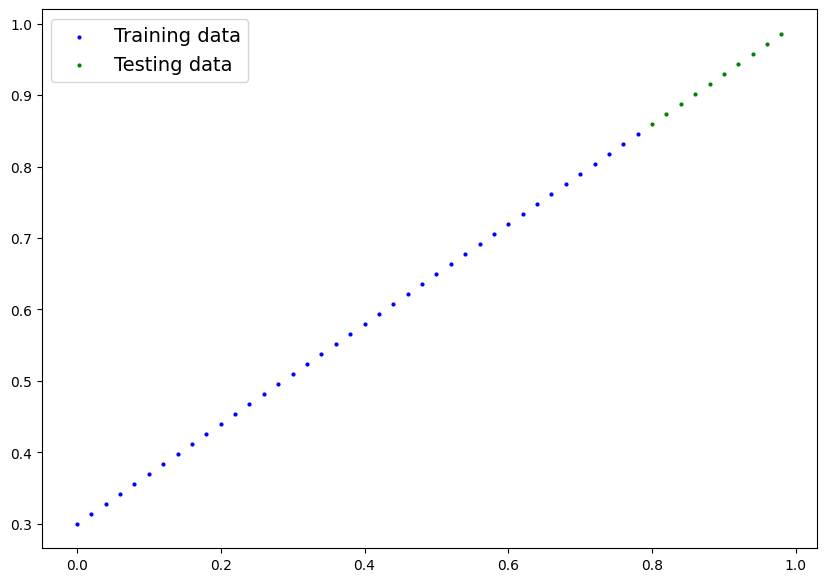

In [ ]:
#!/usr/bin/env python3
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
	plt.figure(figsize=(10, 7))

	# Plot training data in blue
	plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

	# Plot test data in green
	plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

	if predictions is not None:
		# Plot the predictions in red (predictions were made on the test data)
		plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

	# Show the legend
	plt.legend(prop={"size": 14});

plot_predictions();



Define model:

In [ ]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                   dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                   dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)


Train model:

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.4931890368461609 
Epoch: 10 | MAE Train Loss: 0.3013603389263153 | MAE Test Loss: 0.4797181189060211 
Epoch: 20 | MAE Train Loss: 0.28983938694000244 | MAE Test Loss: 0.4662471413612366 
Epoch: 30 | MAE Train Loss: 0.2783183455467224 | MAE Test Loss: 0.4527761936187744 
Epoch: 40 | MAE Train Loss: 0.26679736375808716 | MAE Test Loss: 0.43930521607398987 
Epoch: 50 | MAE Train Loss: 0.2552763819694519 | MAE Test Loss: 0.4258342385292053 
Epoch: 60 | MAE Train Loss: 0.24375538527965546 | MAE Test Loss: 0.41236335039138794 
Epoch: 70 | MAE Train Loss: 0.232234388589859 | MAE Test Loss: 0.398892343044281 
Epoch: 80 | MAE Train Loss: 0.22071340680122375 | MAE Test Loss: 0.38542139530181885 
Epoch: 90 | MAE Train Loss: 0.2091923952102661 | MAE Test Loss: 0.3719504475593567 


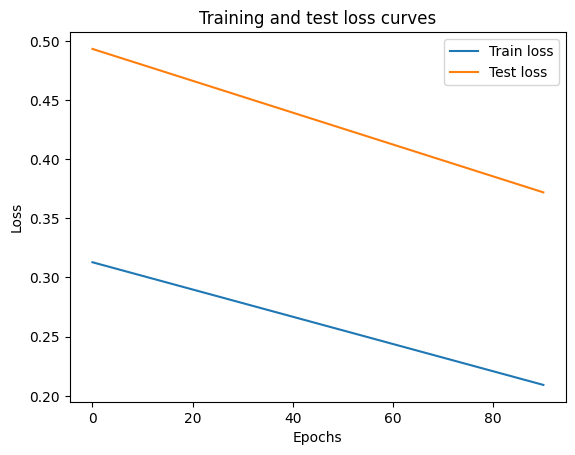

In [ ]:

torch.manual_seed(42)

# create module
model_0 = LinearRegressionModel()

# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.001) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

Make prediction (trained):

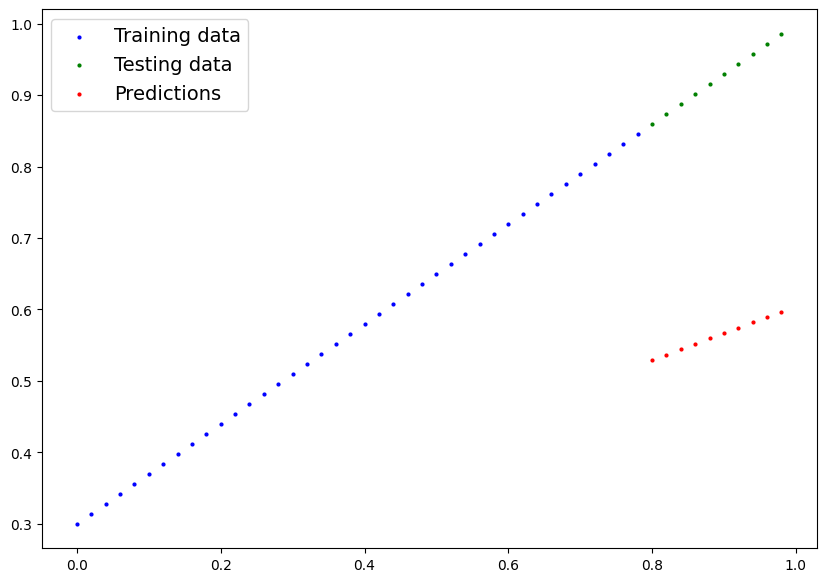

In [ ]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds
plot_predictions(predictions=y_preds)

Save model:

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


Load model:

In [ ]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

Use loaded model:

In [ ]:

# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])